# Example3: Catalog test

In this notebook I will show how to test seal's performance for a catalog.

We will calculate 50% & 90% areas, search area, and make p-p plot.

In [1]:
import bilby
import numpy as np 
import time
import sys
import matplotlib.pyplot as plt
from multiprocessing import Pool
import multiprocessing
from functools import partial
from matplotlib.pyplot import MultipleLocator
from bilby.gw import conversion
from scipy.optimize import leastsq
import json
from pycbc.filter import matched_filter,matched_filter_core
from pycbc.types.timeseries import TimeSeries
from pycbc.types.frequencyseries import FrequencySeries
from lal import LIGOTimeGPS
import scipy
import sealgw
from sealgw import seal
import sealgw.calculation as sealcal
import sealgw.simulation as sealsim

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# This is an example of how to run catalog test, I set Nsample=4.
# In practice you need more samples which is slow to run
seal_O2 = seal.Seal('example_outputs/sealconfig_O2_lhv_BNS.txt')

Nsample = 4
det_name_list = ['L1', 'H1', 'V1']
source_type = "BNS"
ncpu = 4
save_filename = 'example_outputs/catalog_statistics_short.txt' 
psd_files = ['example_inputs/L1_psd.txt','example_inputs/H1_psd.txt','example_inputs/V1_psd.txt']

catalog_stats = seal_O2.catalog_test(Nsample, det_name_list, source_type, ncpu, save_filename,duration = 320,
                      use_bilby_psd = False, custom_psd_path = psd_files)

16:52 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters


Generating source parameters...
Localizing for them...


16:53 bilby INFO    : Injected signal in L1:
16:53 bilby INFO    :   optimal SNR = 2.75
16:53 bilby INFO    :   matched filter SNR = 4.14-1.28j
16:53 bilby INFO    :   chirp_mass = 1.0060312520566577
16:53 bilby INFO    : Injected signal in L1:
16:53 bilby INFO    :   mass_ratio = 0.9924245202173413
16:53 bilby INFO    :   optimal SNR = 5.86
16:53 bilby INFO    :   a_1 = 0.052378672409517935
16:53 bilby INFO    :   matched filter SNR = 5.01+0.84j
16:53 bilby INFO    :   a_2 = 0.09173167373152376
16:53 bilby INFO    :   tilt_1 = 0.0
16:53 bilby INFO    :   chirp_mass = 1.579945541472741
16:53 bilby INFO    :   tilt_2 = 0.0
16:53 bilby INFO    :   mass_ratio = 0.8398722026832189
16:53 bilby INFO    :   a_1 = 0.07827776237046916
16:53 bilby INFO    :   phi_12 = 0.0
16:53 bilby INFO    :   phi_jl = 0.0
16:53 bilby INFO    :   a_2 = 0.03748007686855932
16:53 bilby INFO    :   tilt_1 = 0.0
16:53 bilby INFO    : Injected signal in L1:
16:53 bilby INFO    :   theta_jn = 1.9625764780877466
16:5

Done!
Result file saved to  example_outputs/catalog_statistics_short.txt


In [3]:
# Results from example3-catalog_test.py (contains 1000 events)
save_filename_from_py = 'example_outputs/catalog_statistics.txt' 

catalog_stats = np.loadtxt(save_filename_from_py)

In [4]:
# We store the following statistics
netsnr = catalog_stats[:,0]
area_50 = catalog_stats[:,1]
area_90 = catalog_stats[:,2]
area_search = catalog_stats[:,3]
pencentage = catalog_stats[:,4]
timecost = catalog_stats[:,5]

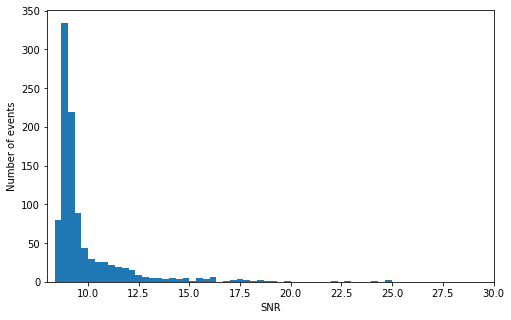

In [5]:
# SNR in your simulation
plt.figure(figsize=(8,5))
x,xx,xxx = plt.hist(netsnr,bins=100)
plt.xlim(8,30)
plt.xlabel('SNR')
plt.ylabel('Number of events')

plt.show()

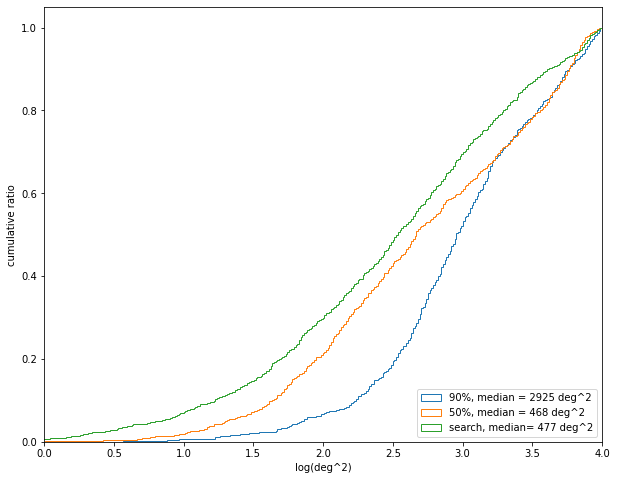

In [6]:
# areas in your simulation
plt.figure(figsize=(10,8))

plt.hist(np.log10(area_90),500,range=(-2,4),cumulative=True,histtype='step',density=True,label='90%, median = {} deg^2'.format(int(np.median(area_90))))
plt.hist(np.log10(area_50),500,range=(-2,4),cumulative=True,histtype='step',density=True,label='50%, median = {} deg^2'.format(int(np.median(area_50))))
plt.hist(np.log10(area_search),500,range=(-2,4),cumulative=True,histtype='step',density=True,label='search, median= {} deg^2'.format(int(np.median(area_search))))
plt.xlim(0,4)
plt.ylabel('cumulative ratio')
plt.xlabel('log(deg^2)')
plt.legend(loc=4)
plt.show() 

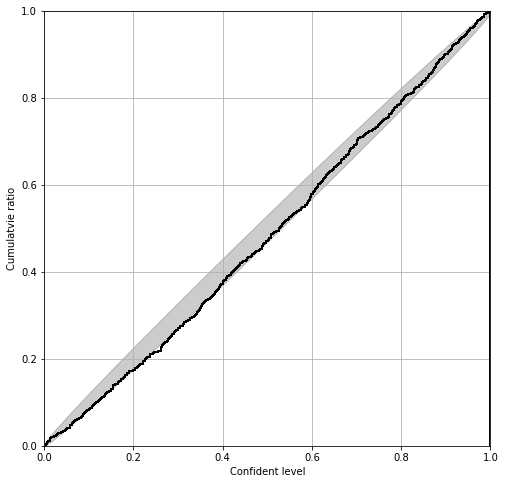

In [7]:
# pp plot
plt.figure(figsize=(8,8))

x,xx,xxx = plt.hist(pencentage,bins=500,cumulative=True,histtype='step',density=True, linewidth=2, color='k')
plt.xlim(0,1)
plt.ylim(0,1)

sample_size=1000
pp,aa,bb = sealcal.localization.confidence_band(sample_size)
plt.fill_between(pp,aa,bb,alpha=0.2, color='k')

plt.xlabel('Confident level')
plt.ylabel('Cumulatvie ratio')
plt.grid()
plt.show()

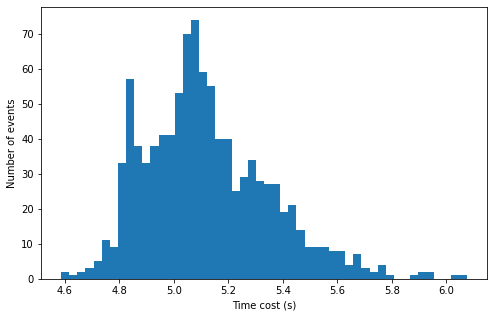

In [8]:
# Timecost in your simulation 
# Note that we use one thread in catalog simualtion, so it's slower than example2
plt.figure(figsize=(8,5))
x,xx,xxx = plt.hist(timecost,bins=50)
plt.xlabel('Time cost (s)')
plt.ylabel('Number of events')

plt.show()